World Happiness Report Project

Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

Dataset Link-https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv

Statement Problem:To predict the happiness score of a country based on some key variables like GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
!pip install scipy
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings ("ignore")

In [2]:
world_hap=pd.read_csv(r"https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/World%20Happiness/happiness_score_dataset.csv")

In [3]:
world_hap

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
#Columns present in the dataset 
world_hap.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Data Exploratory Analysis

In [5]:
#shape of the Data
world_hap.shape

(158, 12)

Observation:

This dataset contain the Happiness ranking of 158 Countries which have both numerical and categorical datas. There are 158 samples in the dataset with 12 columns of which 1 of it is a target variable ('Happiness Score').

In [6]:
# Checking the column information
world_hap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Observation:

The columns have different data types made up of 9 are floats Dtypes, 1 is an integer, and 2 are objects. 

No missing information.


In [7]:
# Check for missing values
world_hap.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no Null values in the dataset

In [8]:
#Seperating the data into Categorical and Numerical Columns

categorical_col =[]
for i in world_hap.dtypes.index:
    if world_hap.dtypes[i]=='object':
        categorical_col.append(i)
print('Categorical Columns: ',categorical_col)
print('\n')


numerical_col =[]
for i in world_hap.dtypes.index:
    if world_hap.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical Columns: ',numerical_col)

Categorical Columns:  ['Country', 'Region']


Numerical Columns:  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [9]:
#Unique values in each of the colums

world_hap.nunique().to_frame("Unique Values")

,Unique Values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


The dataset shows that 'Region' column with 10 unique values  

In [10]:
world_hap['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Data Analysis and Visualization:

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


<Axes: xlabel='Region', ylabel='count'>

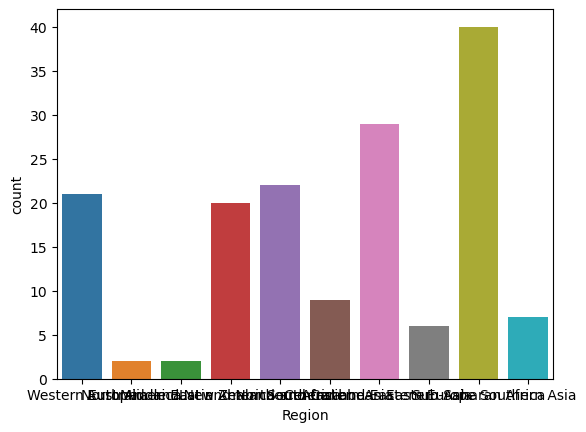

In [11]:
#Counts by Region participation
print(world_hap['Region'].value_counts())
sns.countplot(x ='Region', data=world_hap)

Observation:

The 'Sub-Saharan Africa region' has the highest counts by region follow by 'Central and Eastern Europe region' while the least region by counts are 'North America' and 'Australia and New Zealand'.

In [12]:
#Statistical interpretation of the Dataset
world_hap.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [13]:
cor_wor =world_hap.corr()
cor_wor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [14]:
cor_wor['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

The dataset shows that the key variables contributed positive to getting the happiness score while Standard Error and Happiness Rank shows negative correlation with Happiness Score.

In [22]:
#Encoding the categorical Column

from sklearn.preprocessing import OrdinalEncoder

#Initialize Ordinal Encoder

OE= OrdinalEncoder()


mappings = {}

#Encoding the categorical Column
for i in world_hap.columns:
    if world_hap[i].dtypes=="object":
        original_values= world_hap[i].unique()
        world_hap[i]= OE.fit_transform(world_hap[[i]])
        encoded_values = OE.transform(original_values.reshape(-1, 1)).flatten
        mappings[i] = dict(zip(original_values, encoded_values))

print('Encode Dataframe:\n', world_hap)
print('\nMappings for Each Columns:\n',)
for i, mapping in mappings.items():
    print(f'{i} mapping:', mapping)

TypeError: 'builtin_function_or_method' object is not iterable

In [23]:
world_hap.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

All the columns has been be Converted to Numerical Values

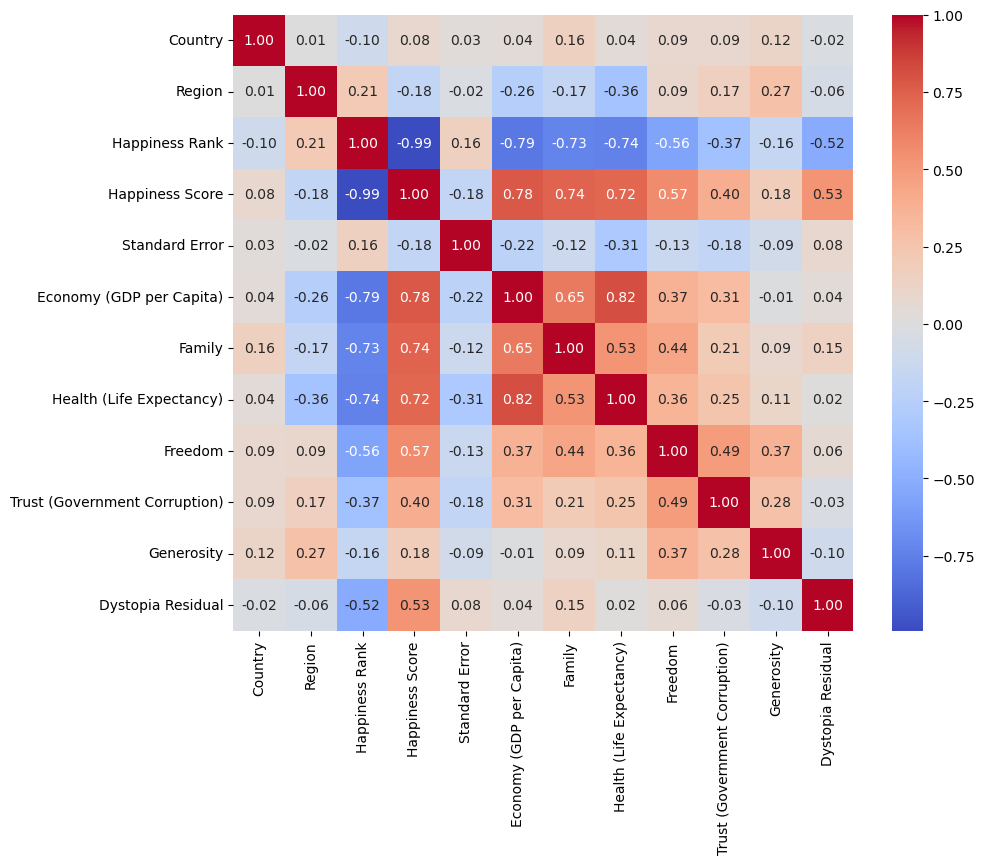

In [24]:
#find the contribution of each component to the quality of the wine
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(world_hap.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [25]:
# Define input features and target variable
x = world_hap.drop(["Happiness Score","Country"], axis=1)
y= world_hap["Happiness Score"]

Dataset Splitting and Training:

In [26]:
#Split the Dataset into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=1)

# Model Training and Evaluation:

In [27]:
#Import training libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import  SVR

1. Random Forest:

In [28]:
#Model Training
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
pred_random_forest = random_forest.predict(x_test)
pred_train = random_forest.predict(x_train)
print(random_forest)
print("R2_Score: ", r2_score(y_test, pred_random_forest)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_random_forest))
print("Mean Squared error: ", mean_squared_error(y_test, pred_random_forest))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_random_forest)))


RandomForestRegressor()
R2_Score:  99.65966616919219
R2_Score on training Data:  99.9024503008463
Mean Absolute error:  0.03606000000000025
Mean Squared error:  0.003825069212499988
Root Mean Squared error:  0.06184714393163186


 2. K Nearest Neighbor:

In [29]:
knn =KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print(knn)
print("R2_Score: ", r2_score(y_test, pred_knn)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_knn))
print("Mean Squared error: ", mean_squared_error(y_test, pred_knn))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_knn)))


KNeighborsRegressor(n_neighbors=3)
R2_Score:  99.66430374127182
R2_Score on training Data:  99.79030636998574
Mean Absolute error:  0.036687499999999984
Mean Squared error:  0.003772946759259255
Root Mean Squared error:  0.061424317328394096


3. Decision Tree:

In [30]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
pred_decision_tree = decision_tree.predict(x_test)
pred_train = decision_tree.predict(x_train)
print(decision_tree)
print("R2_Score: ", r2_score(y_test, pred_decision_tree)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_decision_tree))
print("Mean Squared error: ", mean_squared_error(y_test, pred_decision_tree))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_decision_tree)))

DecisionTreeRegressor()
R2_Score:  99.50663980011498
R2_Score on training Data:  100.0
Mean Absolute error:  0.05770833333333334
Mean Squared error:  0.005544958333333333
Root Mean Squared error:  0.07446447698959104


4. Logistic Regression:

In [31]:
logreg = LinearRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
pred_train = logreg.predict(x_train)
print(logreg)
print("R2_Score: ", r2_score(y_test, pred_logreg)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_logreg))
print("Mean Squared error: ", mean_squared_error(y_test, pred_logreg))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_logreg)))

LinearRegression()
R2_Score:  99.99999351698669
R2_Score on training Data:  99.99999436994236
Mean Absolute error:  0.00022390711824103274
Mean Squared error:  7.286367790058456e-08
Root Mean Squared error:  0.0002699327284724558


5. Gradient Boosting 

In [32]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print(GBR)
print("R2_Score: ", r2_score(y_test, pred_GBR)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_GBR))
print("Mean Squared error: ", mean_squared_error(y_test, pred_GBR))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_GBR)))

GradientBoostingRegressor()
R2_Score:  99.86608909305237
R2_Score on training Data:  99.99993069888582
Mean Absolute error:  0.029482835058465152
Mean Squared error:  0.0015050472242725112
Root Mean Squared error:  0.038794938126932375


6. Lasso

In [33]:
lass = Lasso()
lass.fit(x_train, y_train)
pred_lass = lass.predict(x_test)
pred_train = lass.predict(x_train)
print(lass)
print("R2_Score: ", r2_score(y_test, pred_lass)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_lass))
print("Mean Squared error: ", mean_squared_error(y_test, pred_lass))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_lass)))

Lasso()
R2_Score:  98.25989192681402
R2_Score on training Data:  98.45817968109472
Mean Absolute error:  0.10595244979191831
Mean Squared error:  0.019557367545177073
Root Mean Squared error:  0.13984765834713528


7. Ridge

In [34]:
rid = Ridge()
rid .fit(x_train, y_train)
pred_rid  = rid .predict(x_test)
pred_train = rid .predict(x_train)
print(rid )
print("R2_Score: ", r2_score(y_test, pred_rid )*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_rid ))
print("Mean Squared error: ", mean_squared_error(y_test, pred_rid ))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_rid )))

Ridge()
R2_Score:  98.97286337187793
R2_Score on training Data:  99.20761629868605
Mean Absolute error:  0.08100710504117041
Mean Squared error:  0.011544161460338266
Root Mean Squared error:  0.10744375952254401


8. SVR

In [35]:
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print(svr)
print("R2_Score: ", r2_score(y_test, pred_svr)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_svr))
print("Mean Squared error: ", mean_squared_error(y_test, pred_svr))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_svr)))


SVR()
R2_Score:  98.7922491762635
R2_Score on training Data:  98.95704648106867
Mean Absolute error:  0.06300709489289928
Mean Squared error:  0.01357411480745468
Root Mean Squared error:  0.11650800319057347


As we can see, Linear Regression has the best R2_score, indicating the best model.

# Final Model:

In [36]:
logreg = LinearRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
pred_train = logreg.predict(x_train)
print(logreg)
print("R2_Score: ", r2_score(y_test, pred_logreg)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_logreg))
print("Mean Squared error: ", mean_squared_error(y_test, pred_logreg))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_logreg)))

LinearRegression()
R2_Score:  99.99999351698669
R2_Score on training Data:  99.99999436994236
Mean Absolute error:  0.00022390711824103274
Mean Squared error:  7.286367790058456e-08
Root Mean Squared error:  0.0002699327284724558


In [38]:
# PREDICTION OF TEST RESULT
pred_logreg = logreg.predict(x_test)
print('Predictions:\n', pred_logreg)

Predictions:
 [6.57404881 4.71476313 7.11947497 5.19228779 4.41920204 6.9014121
 5.39863725 7.22570582 6.16762054 4.94864594 4.86711383 5.00701011
 4.69397763 4.95935409 5.81256141 5.09755748 6.12279192 5.85526013
 5.88901894 3.7807044  5.79059528 6.32880996 3.84498891 7.40603221
 4.34996877 6.48514187 6.94618417 5.25277505 4.51780771 5.01312894
 4.51430441 2.90450055 4.07677044 5.99507674 4.33211097 5.12414801
 5.26797528 4.79952445 6.45458438 3.57458362 5.82827398 4.03298581
 4.25197329 7.19975296 5.84763992 4.78788451 6.57499188 5.5482417 ]


In [39]:
# COMPARING TEST DATA AND PREDICTED DATA
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":pred_logreg})
print('Actual test data vs predicted: \n', comparison_df)

Actual test data vs predicted: 
      Actual  Predicted
29    6.574   6.574049
107   4.715   4.714763
14    7.119   7.119475
81    5.192   5.192288
124   4.419   4.419202
19    6.901   6.901412
73    5.399   5.398637
11    7.226   7.225706
40    6.168   6.167621
95    4.949   4.948646
100   4.867   4.867114
92    5.007   5.007010
108   4.694   4.693978
94    4.959   4.959354
58    5.813   5.812561
88    5.098   5.097557
42    6.123   6.122792
53    5.855   5.855260
51    5.889   5.889019
145   3.781   3.780704
59    5.791   5.790595
35    6.329   6.328810
143   3.845   3.844989
5     7.406   7.406032
126   4.350   4.349969
31    6.485   6.485142
16    6.946   6.946184
78    5.253   5.252775
118   4.518   4.517808
91    5.013   5.013129
120   4.514   4.514304
156   2.905   2.904501
135   4.077   4.076770
44    5.995   5.995077
127   4.332   4.332111
85    5.124   5.124148
77    5.268   5.267975
103   4.800   4.799524
33    6.455   6.454584
152   3.575   3.574584
56    5.828   5.828274
1